In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
os.getcwd()

In [6]:
# Plot the images
def save_plot(x_input,lebel,n=4):
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.title(str(lebel[i]),fontsize=10,color="red",fontweight=10,pad='2.0',backgroundcolor='yellow')
        plt.imshow(x_input[i,:,:,0])#, cmap = 'gray_r')
        plt.axis('off')
    plt.show()

In [7]:
# distribution_function
def distribution_function(data_x,data_y):
    
    # Arranging data accoring to their Label
    temp=[[] for i in range(10)]
    for i,j in zip(data_x,data_y):
        if(j==0):
            temp[0].append(i)
        elif(j==1):
            temp[1].append(i)
        elif(j==2):
            temp[2].append(i)
        elif(j==3):
            temp[3].append(i)
        elif(j==4):
            temp[4].append(i)
        elif(j==5):
            temp[5].append(i)
        elif(j==6):
            temp[6].append(i)
        elif(j==7):
            temp[7].append(i)
        elif(j==8):
            temp[8].append(i)
        elif(j==9):
            temp[9].append(i)
    
    # Taking sum
    sum_temp=[]
    for i in temp:
        sum_q = 0.0 
        for j in i:
            sum_q = sum_q + np.sum(j)
        sum_temp.append(sum_q)
    
    # Probabilities
    prob_sum = [i/np.sum(sum_temp) for i in sum_temp]
    return prob_sum

# Real Data

In [8]:
# Real Images
import tensorflow
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train = x_train / 255.0

Shape of real images:  (60000, 28, 28, 1)


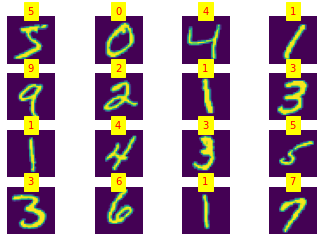

In [9]:
# Plotig real images
real_image = x_train.reshape((x_train.shape[0], 28, 28, 1))
print("Shape of real images: ",real_image.shape)
save_plot(real_image,y_train)

In [10]:
# Distribution of real images
real_distribution = distribution_function(x_train, y_train)
print(real_distribution)

[0.13100674256033298, 0.06535805148724856, 0.11321886092863076, 0.11068398203610917, 0.09044022624292049, 0.08902851179511556, 0.10364673502584021, 0.09152423733029134, 0.1120668717267266, 0.09302578086678412]


# Generated Data

In [11]:
# load the model
loaded_model = tensorflow.keras.models.load_model("Generator_Model_Revised.h5")
loaded_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
in_label (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
in_latent (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 50)        500         in_label[0][0]                   
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 6272)         633472      in_latent[0][0]                  
____________________________________________________________________________________________

In [ ]:
# Generating Images using Adversarial Net.
from numpy import *
from numpy.random import *

latent_dim = 100
n_samples = len(y_train)
x_input = randn(latent_dim * n_samples)
print("Size of Latent Space: ",x_input.shape)

z_input = x_input.reshape(n_samples, latent_dim)
print("Shape of Latent Space: ",z_input.shape)

labels = y_train
print("Size of Labels: ",labels)
labels = labels.reshape(n_samples,)
print("Shape of Labels: ",labels.shape)

data = [z_input,labels]

pred = loaded_model.predict(data)

pred = (pred +1 ) / 2.0
print("Shape of Generated Images: ",pred.shape)

Size of Latent Space:  (6000000,)
Shape of Latent Space:  (60000, 100)
Size of Labels:  [5 0 4 ... 5 6 8]
Shape of Labels:  (60000,)


In [ ]:
# Plot Generated images
save_plot(pred,labels,n=4)

In [ ]:
# Distribution of generated images
generated_distribution = distribution_function(pred, y_train)
generated_distribution

# Finding Divergence Between Two Distribution i.e. quality of a generated image as well as accuracy of model.

Here, we are using JS Divergence

In [ ]:
# JS-Divergence with log base 2
from scipy.spatial.distance import jensenshannon

# define distributions
p = np.array(real_distribution)
q = np.array(generated_distribution)
print("p = %.3f q = %.3f", (sum(p), sum(q)))

# calculate JS(P || Q)
js_pq = jensenshannon(p,q, base = 2)
print('JS(P || Q) divergence: %.3f bits'%(js_pq**2))
print('JS(P || Q) distance: %.3f'%js_pq)

# calculate JS(Q || P)
js_qp = jensenshannon(q,p, base = 2)
print('JS(Q || P) divergence: %.3f bits'%(js_qp**2))
print('JS(Q || P) distance: %.3f'%js_qp)

In [ ]:
# JS-Divergence with log base e
from scipy.spatial.distance import jensenshannon

# define distributions
p = np.array(real_distribution)
q = np.array(generated_distribution)
print("p = %.3f q = %.3f", (sum(p), sum(q)))

# calculate JS(P || Q)
js_pq = jensenshannon(p,q)
print('JS(P || Q) divergence: %.3f nats'%(js_pq**2))
print('JS(P || Q) distance: %.3f'%js_pq)

# calculate JS(Q || P)
js_qp = jensenshannon(q,p)
print('JS(Q || P) divergence: %.3f nats'%(js_qp**2))
print('JS(Q || P) distance: %.3f'%js_qp)

# Conclusion: As we see, divergence between two distribution is approximately 0.So we can say that both distribution are same.

                                            END